In [1]:
# general
from datetime import datetime
from dotenv import load_dotenv, find_dotenv
import os

# custom local libs
from lambda_function import baseball_lambda

In [2]:
# read local .env file
_ = load_dotenv(find_dotenv()) 

In [3]:
# set Langsmith project
today = datetime.now().strftime("%Y%m%d")
os.environ["LANGCHAIN_PROJECT"] = f"Baseball Strikeouts - {today}"

In [4]:
session_id = '5621'

In [5]:
task = '''Plot the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season.'''
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Plan'}}
----
Distance to neareast plan: 0.8255935907363892
Formulating a new plan based on User input
Modifying plan with function metadata
{'Plan': {'messages': [HumanMessage(content='Updated Plan:\n\n1. Use the `playerid_lookup` function to find Danny Duffy\'s MLBAM player ID. Pass "Duffy" as the `last` argument and "Danny" as the `first` argument. From the output, note the `key_mlbam` field for Danny Duffy.\n\n2. With Danny Duffy\'s MLBAM player ID obtained, use the `statcast_pitcher` function to retrieve his pitch-level statcast data for the entire 2018 season. For this, set `start_dt` to "2018-03-29" (the start of the 2018 MLB season), `end_dt` to "2018-10-01" (the end of the regular 2018 MLB season), and `player_id` to Danny Duffy\'s MLBAM player ID obtained from step 1.\n\n3. From the output of the `statcast_pitcher` function, focus on the following fields to identify strikeouts:\n   - `game_date`: To ensure the data is chronologically ordered.\n   - `e

In [6]:
task = "calculate the cumulative sum by first summing the strikeouts for each date and then calculating a cumulative sum across the dates"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Revise'}}
----
{'Revise': {'messages': [HumanMessage(content='Updated Plan:\n\n1. Use the `playerid_lookup` function to find Danny Duffy\'s MLBAM player ID. Pass "Duffy" as the `last` argument and "Danny" as the `first` argument. From the output, note the `key_mlbam` field for Danny Duffy.\n\n2. With Danny Duffy\'s MLBAM player ID obtained, use the `statcast_pitcher` function to retrieve his pitch-level statcast data for the entire 2018 season. For this, set `start_dt` to "2018-03-29" (the start of the 2018 MLB season), `end_dt` to "2018-10-01" (the end of the regular 2018 MLB season), and `player_id` to Danny Duffy\'s MLBAM player ID obtained from step 1.\n\n3. From the output of the `statcast_pitcher` function, focus on the following fields to identify strikeouts:\n   - `game_date`: To ensure the data is chronologically ordered.\n   - `events`: This field contains the result of the plate appearance. Filter this field for entries that contain "strikeout" to i

In [7]:
task = '''The x-axis should be the game date and the y-axis should be the sum of strikeouts thrown to that point in the season'''
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Revise'}}
----
{'Revise': {'messages': [HumanMessage(content='Updated Plan:\n\n1. Use the `playerid_lookup` function to find Danny Duffy\'s MLBAM player ID. Pass "Duffy" as the `last` argument and "Danny" as the `first` argument. From the output, note the `key_mlbam` field for Danny Duffy.\n\n2. With Danny Duffy\'s MLBAM player ID obtained, use the `statcast_pitcher` function to retrieve his pitch-level statcast data for the entire 2018 season. For this, set `start_dt` to "2018-03-29" (the start of the 2018 MLB season), `end_dt` to "2018-10-01" (the end of the regular 2018 MLB season), and `player_id` to Danny Duffy\'s MLBAM player ID obtained from step 1.\n\n3. From the output of the `statcast_pitcher` function, focus on the following fields to identify strikeouts:\n   - `game_date`: To ensure the data is chronologically ordered.\n   - `events`: This field contains the result of the plate appearance. Filter this field for entries that contain "strikeout" to i

{'Orchestrate': {'next': 'Execute'}}
----


Python REPL can execute arbitrary code. Use with caution.


{'agent': {'messages': [AIMessage(content='', additional_kwargs={'function_call': {'arguments': '{\n  "__arg1": "from pybaseball import playerid_lookup\\nplayerid = playerid_lookup(\'Duffy\', \'Danny\')\\nprint(playerid)"\n}', 'name': 'Python_REPL'}})]}}
----
{'action': {'messages': [FunctionMessage(content='Gathering player lookup table. This may take a moment.\n  name_last name_first  key_mlbam key_retro  key_bbref  key_fangraphs  \\\n0     duffy      danny     518633  duffd001  duffyda01           3542   \n\n   mlb_played_first  mlb_played_last  \n0            2011.0           2021.0  \n', name='Python_REPL')]}}
----
{'agent': {'messages': [AIMessage(content='', additional_kwargs={'function_call': {'arguments': '{\n  "__arg1": "from pybaseball import statcast_pitcher\\npitch_data = statcast_pitcher(\'2018-03-29\', \'2018-10-01\', 518633)\\nprint(pitch_data)"\n}', 'name': 'Python_REPL'}})]}}
----
{'action': {'messages': [FunctionMessage(content='Gathering Player Data\n     pitch_type

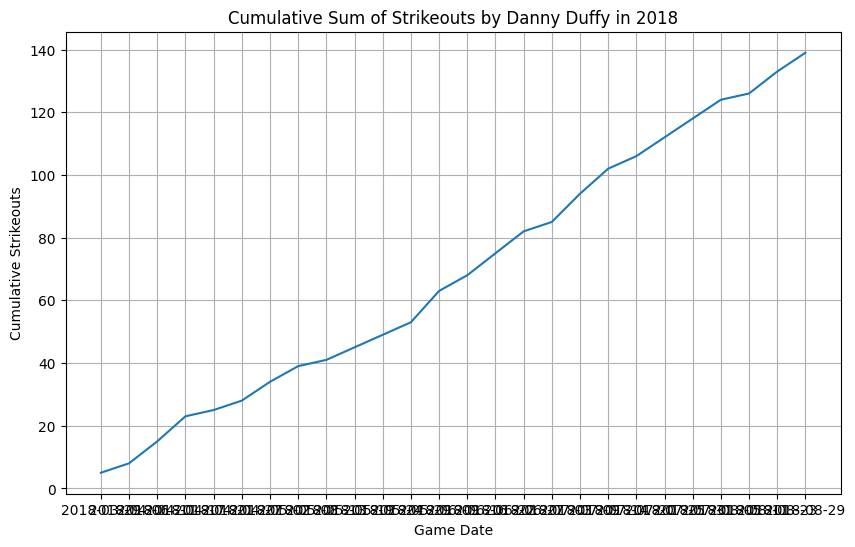

{'action': {'messages': [FunctionMessage(content='', name='Python_REPL')]}}
----
{'agent': {'messages': [AIMessage(content='', additional_kwargs={'function_call': {'arguments': '{\n  "answer": "The plot of the cumulative sum of strikeouts thrown by Danny Duffy in the 2018 season has been successfully generated.",\n  "python_code": "from pybaseball import playerid_lookup\\nplayerid = playerid_lookup(\'Duffy\', \'Danny\')\\n\\nfrom pybaseball import statcast_pitcher\\npitch_data = statcast_pitcher(\'2018-03-29\', \'2018-10-01\', 518633)\\n\\nstrikeouts = pitch_data[pitch_data[\'events\'] == \'strikeout\']\\nstrikeouts_per_date = strikeouts.groupby(\'game_date\').size()\\n\\ncumulative_strikeouts = strikeouts_per_date.cumsum()\\n\\nimport matplotlib.pyplot as plt\\n\\nplt.figure(figsize=(10,6))\\nplt.plot(cumulative_strikeouts)\\nplt.xlabel(\'Game Date\')\\nplt.ylabel(\'Cumulative Strikeouts\')\\nplt.title(\'Cumulative Sum of Strikeouts by Danny Duffy in 2018\')\\nplt.grid(True)\\nplt.sho

In [8]:
task = "approved"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

In [9]:
task = "yes"
result = baseball_lambda.execute_workflow(task, session_id)
print(result)

{'Orchestrate': {'next': 'Memorize'}}
----
{'Memorize': {'messages': [HumanMessage(content='Thank you, task has been written to memory', name='Memorizer')]}}
----
Thank you, task has been written to memory
